# Phân tích dữ liệu Premier League



## 1. Khởi tạo và đọc dữ liệu

Đầu tiên, chúng ta cần import các thư viện cần thiết và đọc dữ liệu.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# Tắt cảnh báo để cho output gọn hơn
warnings.filterwarnings('ignore')
# Hiển thị đầy đủ các cột của DataFrame
pd.set_option('display.max_columns', None)

# Thiết lập style cho seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Đọc dữ liệu từ CSV - ví dụ với tên file pl_data.csv
# Nếu dữ liệu của bạn đang ở dạng khác, hãy thay đổi phù hợp
df = pd.read_csv(r'D:\Desktop\tap tanh hoc code\.vscode\DAP\Reddit_Sentiment_Analysis\dataframe\match_data\match_full_info.csv')

df = df.drop(df.columns[0:2], axis=1)

# Hiển thị 5 dòng đầu tiên để kiểm tra
df.head()

,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away
0,Fri,2024-08-16,20:00 (02:00),Manchester Utd,2.4,1–0,0.4,Fulham,"73,297",Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55%,45%,36%,20%,2,3,0,0
1,Sat,2024-08-17,12:30 (18:30),Ipswich Town,0.5,0–2,2.6,Liverpool,"30,014",Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38%,62%,29%,28%,3,1,0,0
2,Sat,2024-08-17,15:00 (21:00),Newcastle Utd,0.3,1–0,1.8,Southampton,"52,196",St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23%,77%,33%,16%,2,4,1,0
3,Sat,2024-08-17,15:00 (21:00),Nott'ham Forest,1.3,1–1,1.2,Bournemouth,"29,763",The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53%,47%,57%,31%,1,3,0,0
4,Sat,2024-08-17,15:00 (21:00),Everton,0.5,0–3,1.4,Brighton,"39,217",Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40%,60%,11%,50%,1,1,1,0



## 2. Khám phá dữ liệu và tiền xử lý

Chúng ta cần hiểu cấu trúc dữ liệu và tiền xử lý nếu cần.


In [5]:
# Kiểm tra thông tin dữ liệu
print("Thông tin dữ liệu:")
df.info()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Day                   380 non-null    object 
 1   Date                  380 non-null    object 
 2   Time                  380 non-null    object 
 3   Home                  380 non-null    object 
 4   xG_Home               259 non-null    float64
 5   Score                 259 non-null    object 
 6   xG_Away               259 non-null    float64
 7   Away                  380 non-null    object 
 8   Attendance            257 non-null    object 
 9   Venue                 380 non-null    object 
 10  Referee               259 non-null    object 
 11  Match_Report_Link     380 non-null    object 
 12  Manager_Home          380 non-null    object 
 13  Manager_Away          380 non-null    object 
 14  Lineup_Home           259 non-null    object 
 15  Line

In [6]:
# Kiểm tra các giá trị null
print("\nSố lượng giá trị null trong mỗi cột:")
print(df.isnull().sum())



Số lượng giá trị null trong mỗi cột:
Day                       0
Date                      0
Time                      0
Home                      0
xG_Home                 121
Score                   121
xG_Away                 121
Away                      0
Attendance              123
Venue                     0
Referee                 121
Match_Report_Link         0
Manager_Home              0
Manager_Away              0
Lineup_Home             121
Lineup_Away             121
Fouls_Home              121
Fouls_Away              121
Corners_Home            121
Corners_Away            121
Crosses_Home            121
Crosses_Away            121
Touches_Home            121
Touches_Away            121
Tackles_Home            121
Tackles_Away            121
Possession_Home         121
Possession_Away         121
Shots_on_Target_Home    121
Shots_on_Target_Away    121
Yellow_Cards_Home         0
Yellow_Cards_Away         0
Red_Cards_Home            0
Red_Cards_Away            0
dtype: int

In [7]:

# Kiểm tra thống kê mô tả
print("\nThống kê mô tả cho dữ liệu số:")
print(df.describe())



Thống kê mô tả cho dữ liệu số:
          xG_Home     xG_Away  Fouls_Home  Fouls_Away  Corners_Home  \
count  259.000000  259.000000  259.000000  259.000000    259.000000   
mean     1.526641    1.377606   10.996139   11.428571      5.583012   
std      0.808785    0.860616    3.720359    3.554356      3.229566   
min      0.100000    0.000000    2.000000    3.000000      0.000000   
25%      0.900000    0.800000    9.000000    9.000000      3.000000   
50%      1.500000    1.200000   11.000000   11.000000      5.000000   
75%      2.000000    1.750000   13.000000   14.000000      8.000000   
max      4.400000    5.600000   21.000000   21.000000     17.000000   

       Corners_Away  Crosses_Home  Crosses_Away  Touches_Home  Touches_Away  \
count    259.000000     259.00000    259.000000    259.000000    259.000000   
mean       4.911197      19.15444     15.876448    608.254826    595.474903   
std        3.010935       8.22876      6.701280    109.461954    108.808925   
min        0

In [8]:
# Chuyển đổi cột Date thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tách cột Time để dễ phân tích
df['Time'] = df['Time'].str.split(' ').str[0]

# Xử lý cột Score để lấy số bàn thắng
df[['Home_Goals', 'Away_Goals']] = df['Score'].str.split('–', expand=True).astype(float)
df['Total_Goals'] = df['Home_Goals'] + df['Away_Goals']
df['Goal_Difference'] = df['Home_Goals'] - df['Away_Goals']
df.head()


,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,Home_Goals,Away_Goals,Total_Goals,Goal_Difference
0,Fri,2024-08-16,20:00,Manchester Utd,2.4,1–0,0.4,Fulham,"73,297",Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55%,45%,36%,20%,2,3,0,0,1.0,0.0,1.0,1.0
1,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,"30,014",Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38%,62%,29%,28%,3,1,0,0,0.0,2.0,2.0,-2.0
2,Sat,2024-08-17,15:00,Newcastle Utd,0.3,1–0,1.8,Southampton,"52,196",St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23%,77%,33%,16%,2,4,1,0,1.0,0.0,1.0,1.0
3,Sat,2024-08-17,15:00,Nott'ham Forest,1.3,1–1,1.2,Bournemouth,"29,763",The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53%,47%,57%,31%,1,3,0,0,1.0,1.0,2.0,0.0
4,Sat,2024-08-17,15:00,Everton,0.5,0–3,1.4,Brighton,"39,217",Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40%,60%,11%,50%,1,1,1,0,0.0,3.0,3.0,-3.0


In [9]:
print(df.dtypes)

Day                             object
Date                    datetime64[ns]
Time                            object
Home                            object
xG_Home                        float64
Score                           object
xG_Away                        float64
Away                            object
Attendance                      object
Venue                           object
Referee                         object
Match_Report_Link               object
Manager_Home                    object
Manager_Away                    object
Lineup_Home                     object
Lineup_Away                     object
Fouls_Home                     float64
Fouls_Away                     float64
Corners_Home                   float64
Corners_Away                   float64
Crosses_Home                   float64
Crosses_Away                   float64
Touches_Home                   float64
Touches_Away                   float64
Tackles_Home                   float64
Tackles_Away             

In [10]:
# Tạo cột kết quả cho đội nhà
df['Result_Home'] = np.where(df['Home_Goals'] > df['Away_Goals'], 'Win',
                       np.where(df['Home_Goals'] < df['Away_Goals'], 'Loss', 'Draw'))

# Tạo cột phân biệt trận đấu có bàn thắng hay không
df['Had_Goals'] = df['Total_Goals'] > 0

# Chuyển đổi % thành số
df['Possession_Home'] = df['Possession_Home'].str.rstrip('%').astype(float)
df['Possession_Away'] = df['Possession_Away'].str.rstrip('%').astype(float)
df['Shots_on_Target_Home'] = df['Shots_on_Target_Home'].str.rstrip('%').astype(float)
df['Shots_on_Target_Away'] = df['Shots_on_Target_Away'].str.rstrip('%').astype(float)
df['Attendance'] = df['Attendance'].str.replace(',', '').astype(float)

# Kiểm tra lại dữ liệu sau khi xử lý
df.head()


,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,Home_Goals,Away_Goals,Total_Goals,Goal_Difference,Result_Home,Had_Goals
0,Fri,2024-08-16,20:00,Manchester Utd,2.4,1–0,0.4,Fulham,73297.0,Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55.0,45.0,36.0,20.0,2,3,0,0,1.0,0.0,1.0,1.0,Win,True
1,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,30014.0,Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38.0,62.0,29.0,28.0,3,1,0,0,0.0,2.0,2.0,-2.0,Loss,True
2,Sat,2024-08-17,15:00,Newcastle Utd,0.3,1–0,1.8,Southampton,52196.0,St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23.0,77.0,33.0,16.0,2,4,1,0,1.0,0.0,1.0,1.0,Win,True
3,Sat,2024-08-17,15:00,Nott'ham Forest,1.3,1–1,1.2,Bournemouth,29763.0,The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53.0,47.0,57.0,31.0,1,3,0,0,1.0,1.0,2.0,0.0,Draw,True
4,Sat,2024-08-17,15:00,Everton,0.5,0–3,1.4,Brighton,39217.0,Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40.0,60.0,11.0,50.0,1,1,1,0,0.0,3.0,3.0,-3.0,Loss,True



## 3. Phân tích và Trực quan hóa dữ liệu

### 3.1 Phân tích thời gian và lịch thi đấu


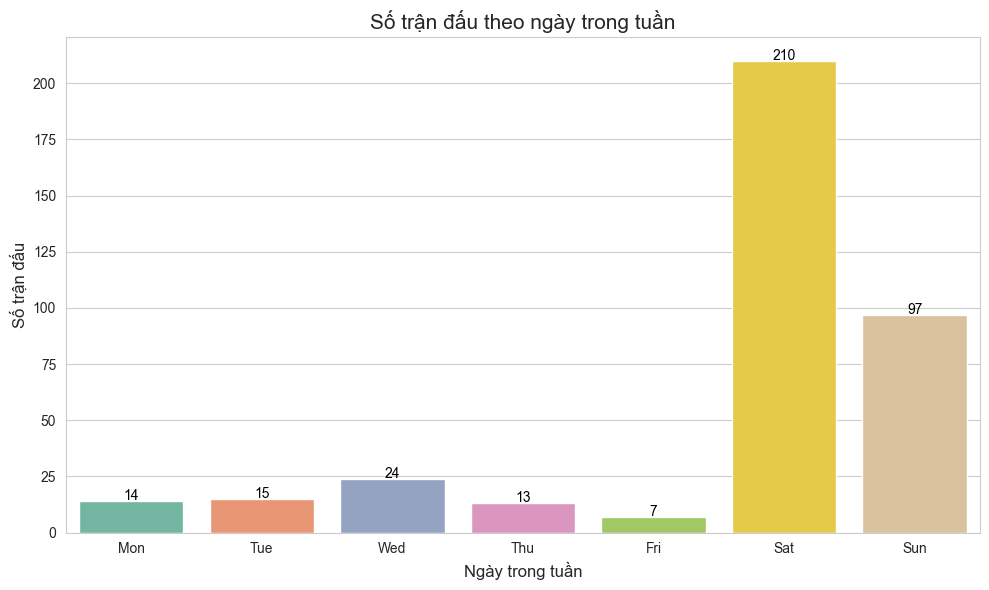

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đặt thứ tự ngày trong tuần mong muốn
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Đếm số trận theo ngày trong tuần và xử lý NaN nếu có
day_counts = df['Day'].value_counts().reindex(day_order).fillna(0)

# Vẽ biểu đồ với màu sắc đẹp hơn và thêm số liệu trên cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_order, y=day_counts.values, palette="Set2")

# Thêm số liệu lên các cột
for i, value in enumerate(day_counts.values):
    ax.text(i, value + 0.5, f'{int(value)}', ha='center', fontsize=10, color='black')

# Thêm tiêu đề và nhãn trục
plt.title('Số trận đấu theo ngày trong tuần', fontsize=15)
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Số trận đấu', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



**Nhận Xét** : Số trận đấu diễn ra nhiều nhất vào Thứ Bảy (210 trận) và Chủ Nhật (97 trận), trong khi các ngày còn lại có số trận rất ít, đặc biệt Thứ Sáu chỉ có 7 trận.

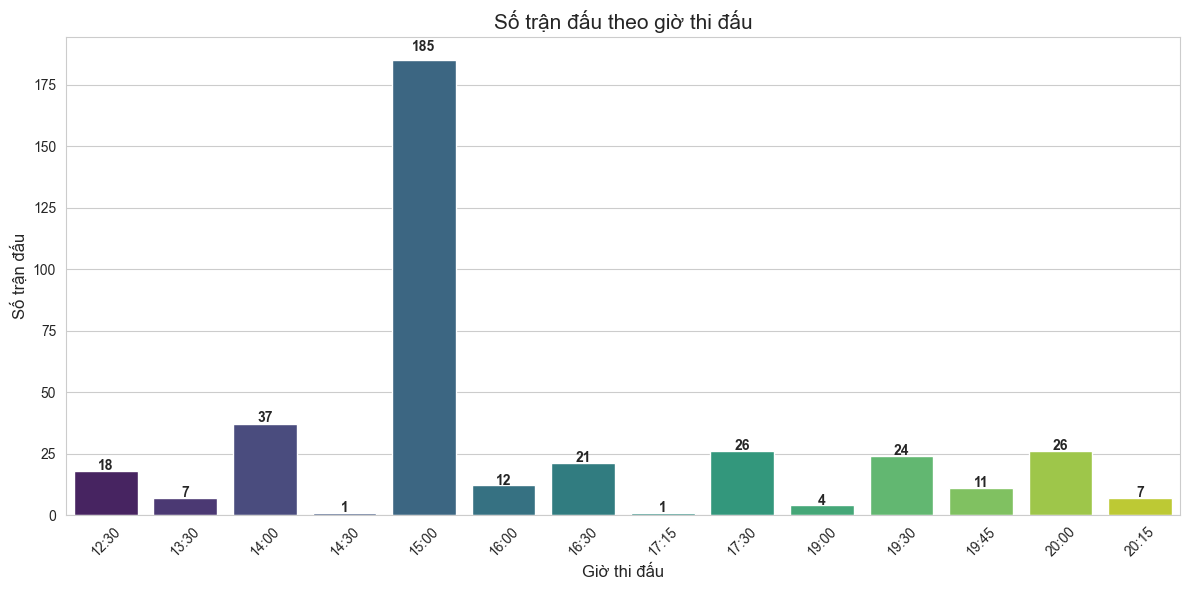

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Chuyển cột 'Time' về datetime nếu cần (nếu 'Time' là chuỗi dạng HH:MM)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.strftime('%H:%M')

# Đếm số trận theo giờ thi đấu
time_counts = df['Time'].value_counts().sort_index()

# Vẽ biểu đồ
ax = sns.barplot(x=time_counts.index, y=time_counts.values, palette="viridis")

# Thiết lập tiêu đề và nhãn
plt.title('Số trận đấu theo giờ thi đấu', fontsize=15)
plt.xlabel('Giờ thi đấu', fontsize=12)
plt.ylabel('Số trận đấu', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Thêm giá trị lên đầu mỗi cột
for i, v in enumerate(time_counts.values):
    ax.text(i, v * 1.02, str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


**Nhận Xét:** Các trận đấu chủ yếu diễn ra vào buổi chiều, với khung giờ 15:00 có số trận áp đảo (185 trận), trong khi các khung giờ sáng và tối có số trận ít hơn và phân bổ rải rác.

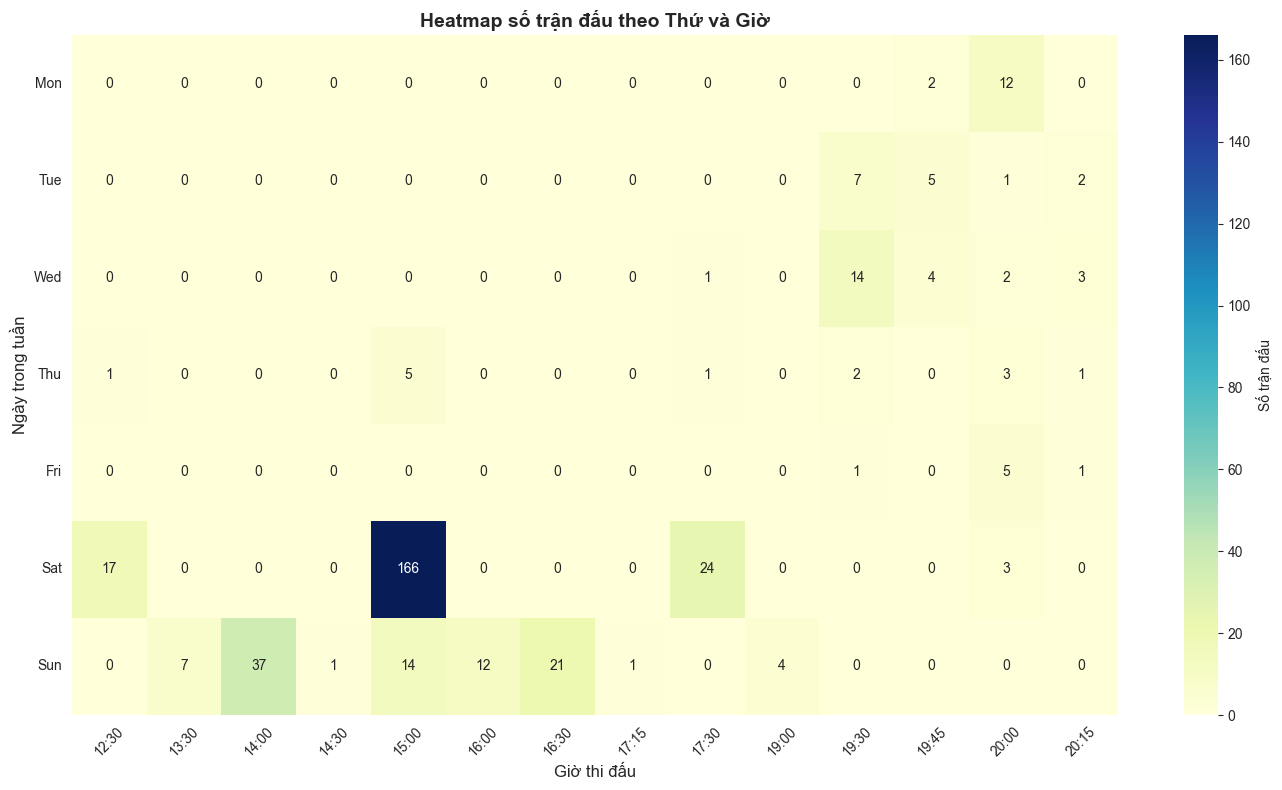

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Định dạng lại thứ tự ngày trong tuần
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Kiểm tra và lọc những ngày hợp lệ
df = df[df['Day'].isin(day_order)]

# Tạo bảng chéo số trận đấu theo ngày và giờ
cross_tab = pd.crosstab(df['Day'], df['Time'])
cross_tab = cross_tab.reindex(day_order)

# Vẽ heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', linewidths=0, cbar_kws={'label': 'Số trận đấu'})

# Thêm tiêu đề và nhãn trục
plt.title("Heatmap số trận đấu theo Thứ và Giờ", fontsize=14, fontweight="bold")
plt.xlabel('Giờ thi đấu', fontsize=12)
plt.ylabel('Ngày trong tuần', fontsize=12)

plt.xticks(rotation=45)  # Xoay nhãn giờ cho dễ đọc
plt.yticks(rotation=0)  # Giữ nhãn ngày ngang để dễ nhìn
plt.tight_layout()
plt.show()


**Nhận Xét:** Các trận đấu tập trung nhiều nhất vào chiều Thứ Bảy (đặc biệt là 15:00), trong khi các ngày trong tuần có rất ít trận và chủ yếu diễn ra vào buổi chiều.

### 3.2 Phân tích các chỉ số trong trận đấu


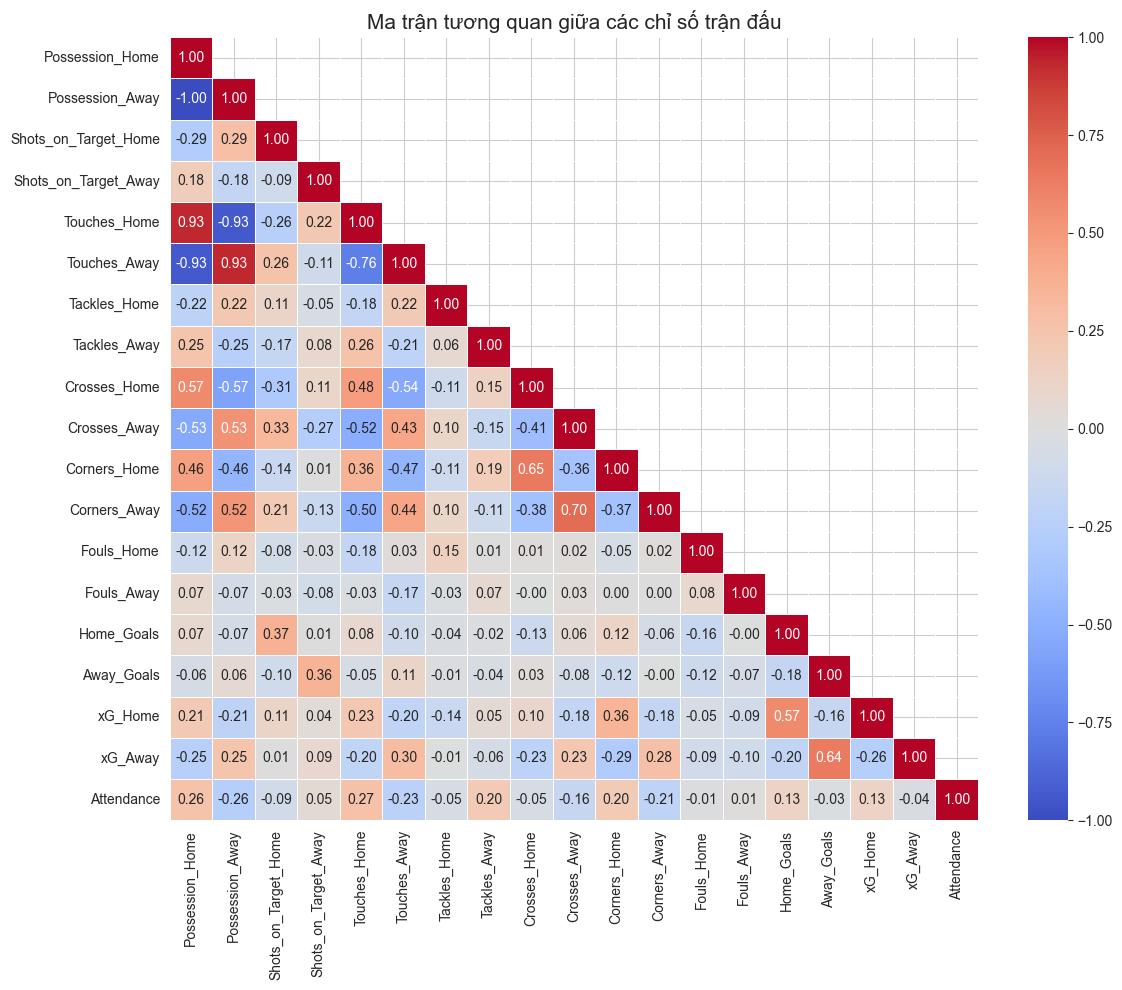

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc các cột có trong DataFrame để tránh lỗi thiếu cột
correlation_columns = ['Possession_Home', 'Possession_Away', 
                       'Shots_on_Target_Home', 'Shots_on_Target_Away',
                       'Touches_Home', 'Touches_Away',
                       'Tackles_Home', 'Tackles_Away',
                       'Crosses_Home', 'Crosses_Away',
                       'Corners_Home', 'Corners_Away',
                       'Fouls_Home', 'Fouls_Away',
                       'Home_Goals', 'Away_Goals',
                       'xG_Home', 'xG_Away', 'Attendance']

# Chỉ lấy các cột có trong DataFrame để tránh lỗi
existing_columns = [col for col in correlation_columns if col in df.columns]

# Xử lý dữ liệu thiếu
df_clean = df[existing_columns].dropna()

# Tính ma trận tương quan
correlation_matrix = df_clean.corr()

# Tạo mask tam giác trên
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            annot_kws={"size": 10})  # Điều chỉnh kích thước chữ trong ô

plt.title('Ma trận tương quan giữa các chỉ số trận đấu', fontsize=15)
plt.tight_layout()
plt.show()


**Nhận Xét:** Đội kiểm soát bóng nhiều có số lần chạm bóng cao (`Possession_Home` và `Touches_Home`, 0.93), số cú sút trúng đích có tương quan dương với số bàn thắng (`Shots_on_Target_Home` và `Home_Goals`, 0.37), số quả phạt góc có liên hệ cao với số quả tạt, và lượng khán giả không ảnh hưởng đáng kể đến các chỉ số trận đấu.

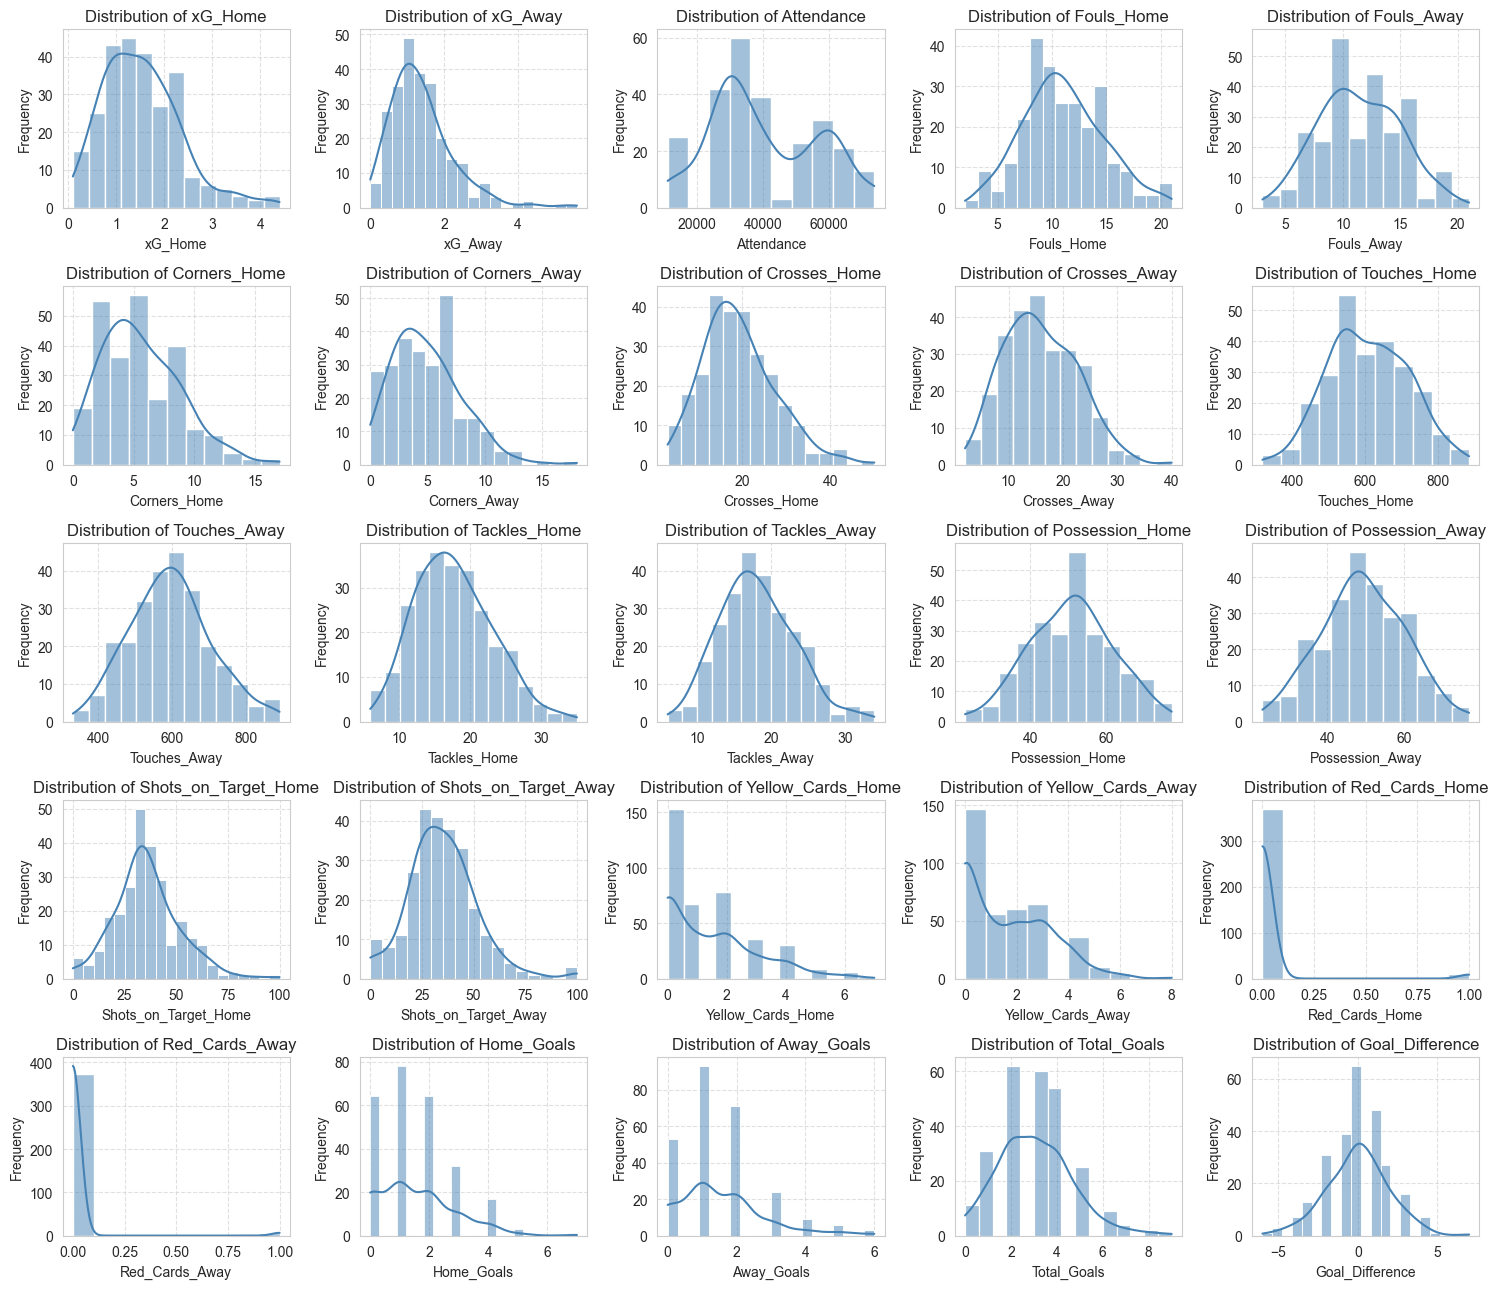

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns

# Vẽ histogram với KDE
plt.figure(figsize=(15, 13))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col], kde=True, bins='auto', color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### 3.3 Phân tích điểm số và xG

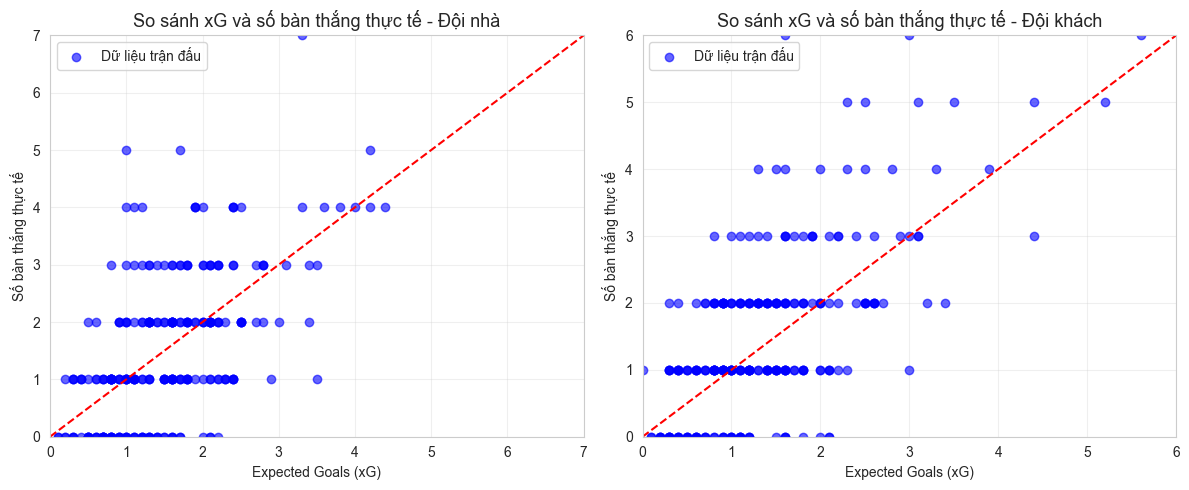

In [16]:
import matplotlib.pyplot as plt

# Danh sách chứa thông tin của hai biểu đồ
teams = [('xG_Home', 'Home_Goals', 'Đội nhà'), ('xG_Away', 'Away_Goals', 'Đội khách')]

plt.figure(figsize=(12, 5))

for i, (xg, goals, team) in enumerate(teams, 1):
    plt.subplot(1, 2, i)  # Tạo subplot (1 hàng, 2 cột)
    plt.scatter(df[xg], df[goals], alpha=0.6, label="Dữ liệu trận đấu", color='blue')
    
    # Vẽ đường tham chiếu y = x
    max_val = max(df[xg].max(), df[goals].max())  # Đảm bảo trục phù hợp
    plt.plot([0, max_val], [0, max_val], 'r--')

    # Định dạng biểu đồ
    plt.title(f'So sánh xG và số bàn thắng thực tế - {team}', fontsize=13)
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Số bàn thắng thực tế')
    plt.xlim(0, max_val)
    plt.ylim(0, max_val)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
plt.tight_layout()
plt.show()



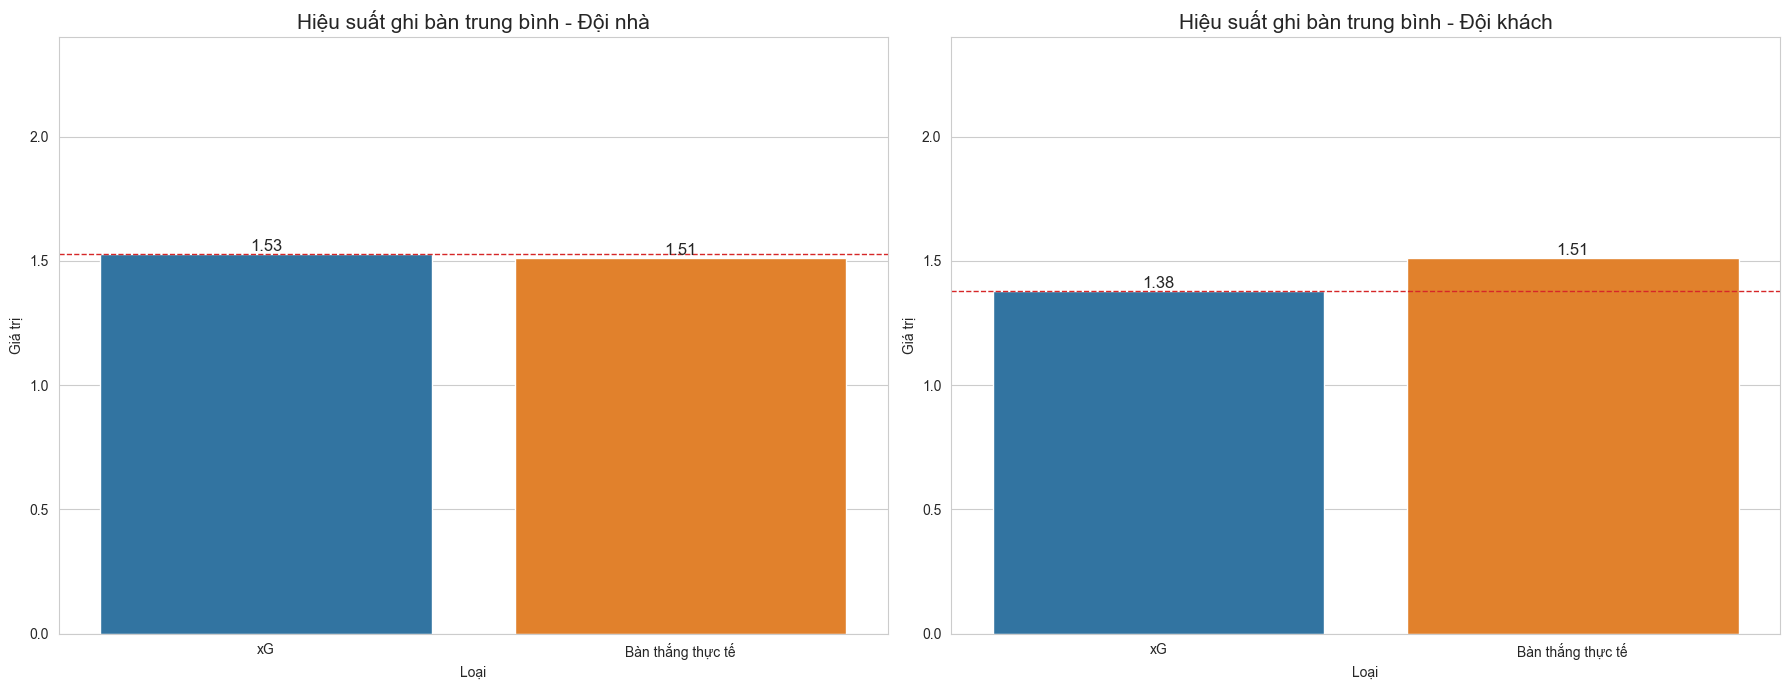

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Màu sắc cho từng loại cột
colors = ['#1f77b4', '#ff7f0e']  

# Hiệu suất đội nhà
home_performance = pd.DataFrame({
    'Loại': ['xG', 'Bàn thắng thực tế'],
    'Giá trị': [df['xG_Home'].mean(), df['Home_Goals'].mean()]
})

sns.barplot(x='Loại', y='Giá trị', data=home_performance, ax=ax[0], palette=colors)
ax[0].set_title('Hiệu suất ghi bàn trung bình - Đội nhà', fontsize=15)
ax[0].set_ylim(0, max(home_performance['Giá trị'].max(), 2) * 1.2)
ax[0].axhline(df['xG_Home'].mean(), color='#d62728', linestyle='--', linewidth=1)

# Thêm nhãn giá trị trên cột
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.2f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=12)

# Hiệu suất đội khách
away_performance = pd.DataFrame({
    'Loại': ['xG', 'Bàn thắng thực tế'],
    'Giá trị': [df['xG_Away'].mean(), df['Away_Goals'].mean()]
})

sns.barplot(x='Loại', y='Giá trị', data=away_performance, ax=ax[1], palette=colors)
ax[1].set_title('Hiệu suất ghi bàn trung bình - Đội khách', fontsize=15)
ax[1].set_ylim(0, max(away_performance['Giá trị'].max(), 2) * 1.2)
ax[1].axhline(df['xG_Away'].mean(), color='#d62728', linestyle='--', linewidth=1)

# Thêm nhãn giá trị trên cột
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height():.2f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


**Nhận xét:** Hai biểu đồ cho thấy xG có mối tương quan với số bàn thắng thực tế. Tuy nhiên, dù xG của đội nhà thường cao hơn, đội khách lại ghi bàn hiệu quả hơn, cho thấy khả năng tận dụng cơ hội tốt hơn trên sân khách.

### 3.4 Phân tích hiệu suất các đội

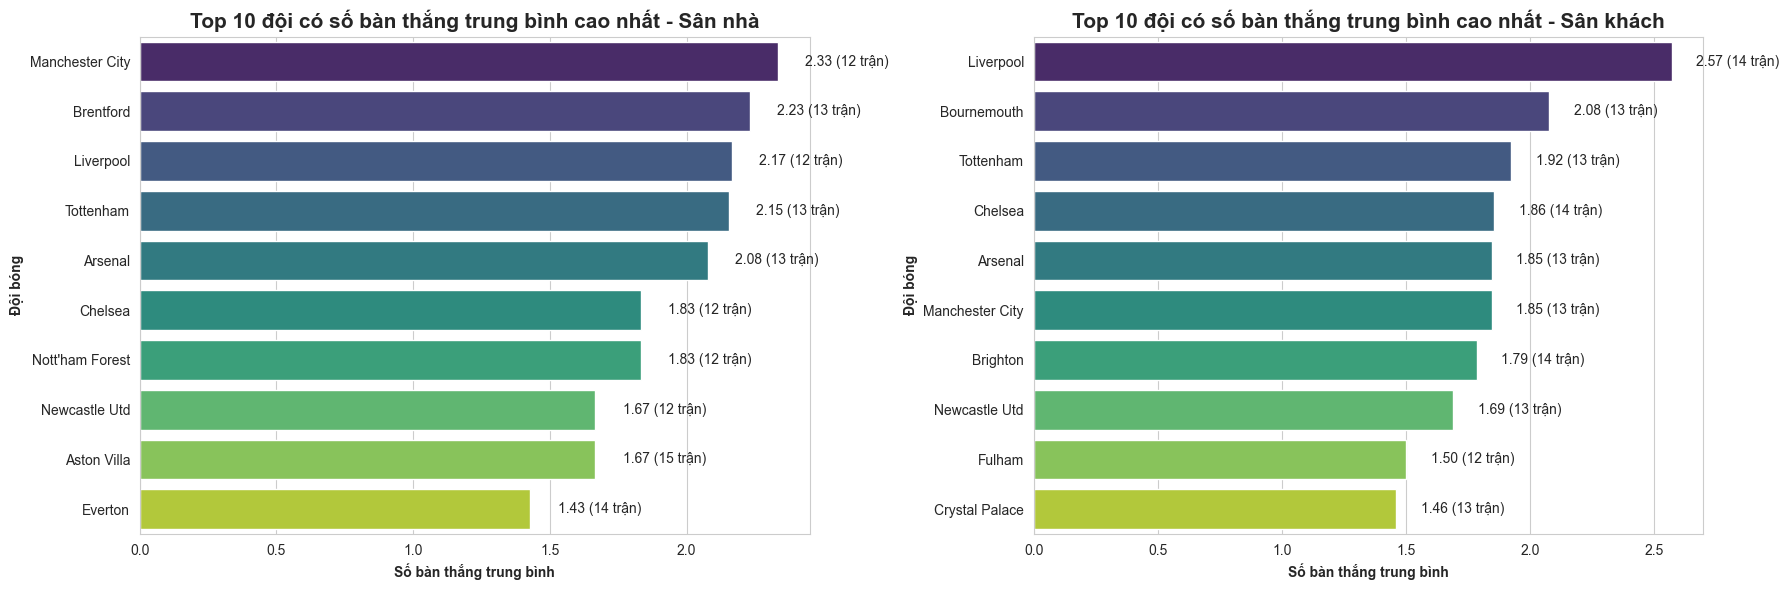

In [18]:
# Tạo dữ liệu top 10 đội ghi bàn sân nhà
home_goals_by_team = df.groupby('Home')['Home_Goals'].agg(['mean', 'count']).reset_index()
home_goals_by_team = home_goals_by_team.sort_values('mean', ascending=False).head(10)

# Tạo dữ liệu top 10 đội ghi bàn sân khách
away_goals_by_team = df.groupby('Away')['Away_Goals'].agg(['mean', 'count']).reset_index()
away_goals_by_team = away_goals_by_team.sort_values('mean', ascending=False).head(10)

# Tạo figure và các subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ đội nhà
ax = sns.barplot(x='mean', y='Home', data=home_goals_by_team, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 đội có số bàn thắng trung bình cao nhất - Sân nhà', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Số bàn thắng trung bình', fontweight='bold')
axes[0].set_ylabel('Đội bóng', fontweight='bold')

# Thêm số trận vào cột
for i, v in enumerate(home_goals_by_team['mean']):
    axes[0].text(v + 0.1, i, f"{v:.2f} ({home_goals_by_team['count'].iloc[i]} trận)", va='center')

# Biểu đồ đội khách
ax = sns.barplot(x='mean', y='Away', data=away_goals_by_team, palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 đội có số bàn thắng trung bình cao nhất - Sân khách', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Số bàn thắng trung bình', fontweight='bold')
axes[1].set_ylabel('Đội bóng', fontweight='bold')

# Thêm số trận vào cột
for i, v in enumerate(away_goals_by_team['mean']):
    axes[1].text(v + 0.1, i, f"{v:.2f} ({away_goals_by_team['count'].iloc[i]} trận)", va='center')

plt.tight_layout()
plt.show()


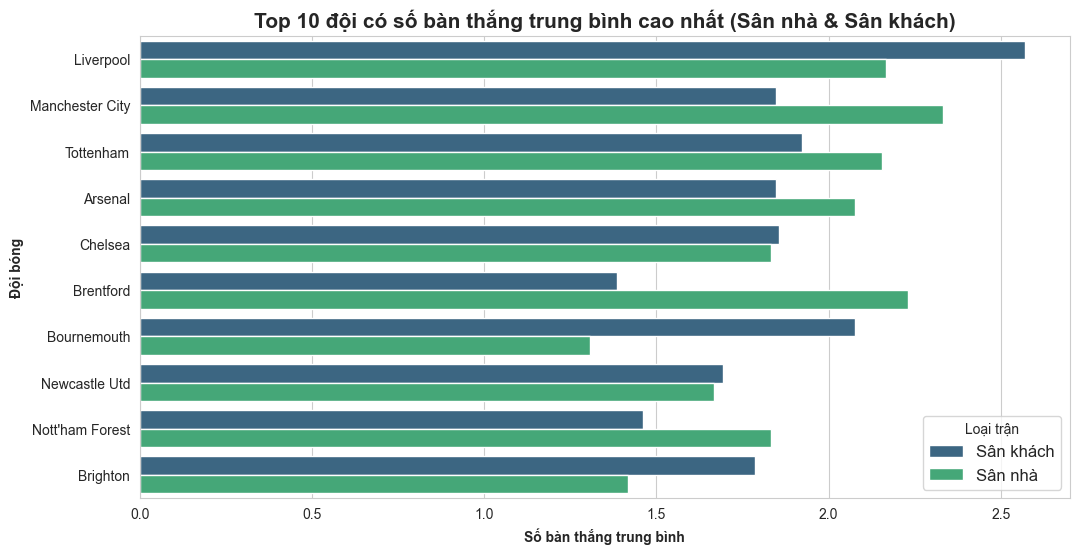

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo dữ liệu top 10 đội ghi bàn (cả sân nhà và sân khách)
home_goals_by_team = df.groupby('Home')['Home_Goals'].agg(['mean', 'count']).reset_index()
away_goals_by_team = df.groupby('Away')['Away_Goals'].agg(['mean', 'count']).reset_index()

# Đổi tên cột để thống nhất
home_goals_by_team.rename(columns={'Home': 'Team', 'mean': 'Average_Goals', 'count': 'Matches'}, inplace=True)
away_goals_by_team.rename(columns={'Away': 'Team', 'mean': 'Average_Goals', 'count': 'Matches'}, inplace=True)

# Thêm cột loại bàn thắng
home_goals_by_team['Type'] = 'Sân nhà'
away_goals_by_team['Type'] = 'Sân khách'

# Kết hợp hai bảng lại
combined_goals = pd.concat([home_goals_by_team, away_goals_by_team])

# Chọn top 10 đội ghi bàn cao nhất dựa trên trung bình tổng thể
top_teams = combined_goals.groupby('Team')['Average_Goals'].mean().sort_values(ascending=False).head(10)
combined_goals = combined_goals[combined_goals['Team'].isin(top_teams.index)]
combined_goals['Team'] = pd.Categorical(combined_goals['Team'], categories=top_teams.index, ordered=True)
combined_goals = combined_goals.sort_values('Team')

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Goals', y='Team', hue='Type', data=combined_goals, palette='viridis')

# Tùy chỉnh biểu đồ
plt.title("Top 10 đội có số bàn thắng trung bình cao nhất (Sân nhà & Sân khách)", fontsize=15, fontweight='bold')
plt.xlabel("Số bàn thắng trung bình", fontweight='bold')
plt.ylabel("Đội bóng", fontweight='bold')
plt.legend(title="Loại trận", fontsize=12)

plt.show()


In [20]:
df.head()

,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,Home_Goals,Away_Goals,Total_Goals,Goal_Difference,Result_Home,Had_Goals
0,Fri,2024-08-16,20:00,Manchester Utd,2.4,1–0,0.4,Fulham,73297.0,Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55.0,45.0,36.0,20.0,2,3,0,0,1.0,0.0,1.0,1.0,Win,True
1,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,30014.0,Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38.0,62.0,29.0,28.0,3,1,0,0,0.0,2.0,2.0,-2.0,Loss,True
2,Sat,2024-08-17,15:00,Newcastle Utd,0.3,1–0,1.8,Southampton,52196.0,St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23.0,77.0,33.0,16.0,2,4,1,0,1.0,0.0,1.0,1.0,Win,True
3,Sat,2024-08-17,15:00,Nott'ham Forest,1.3,1–1,1.2,Bournemouth,29763.0,The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53.0,47.0,57.0,31.0,1,3,0,0,1.0,1.0,2.0,0.0,Draw,True
4,Sat,2024-08-17,15:00,Everton,0.5,0–3,1.4,Brighton,39217.0,Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40.0,60.0,11.0,50.0,1,1,1,0,0.0,3.0,3.0,-3.0,Loss,True


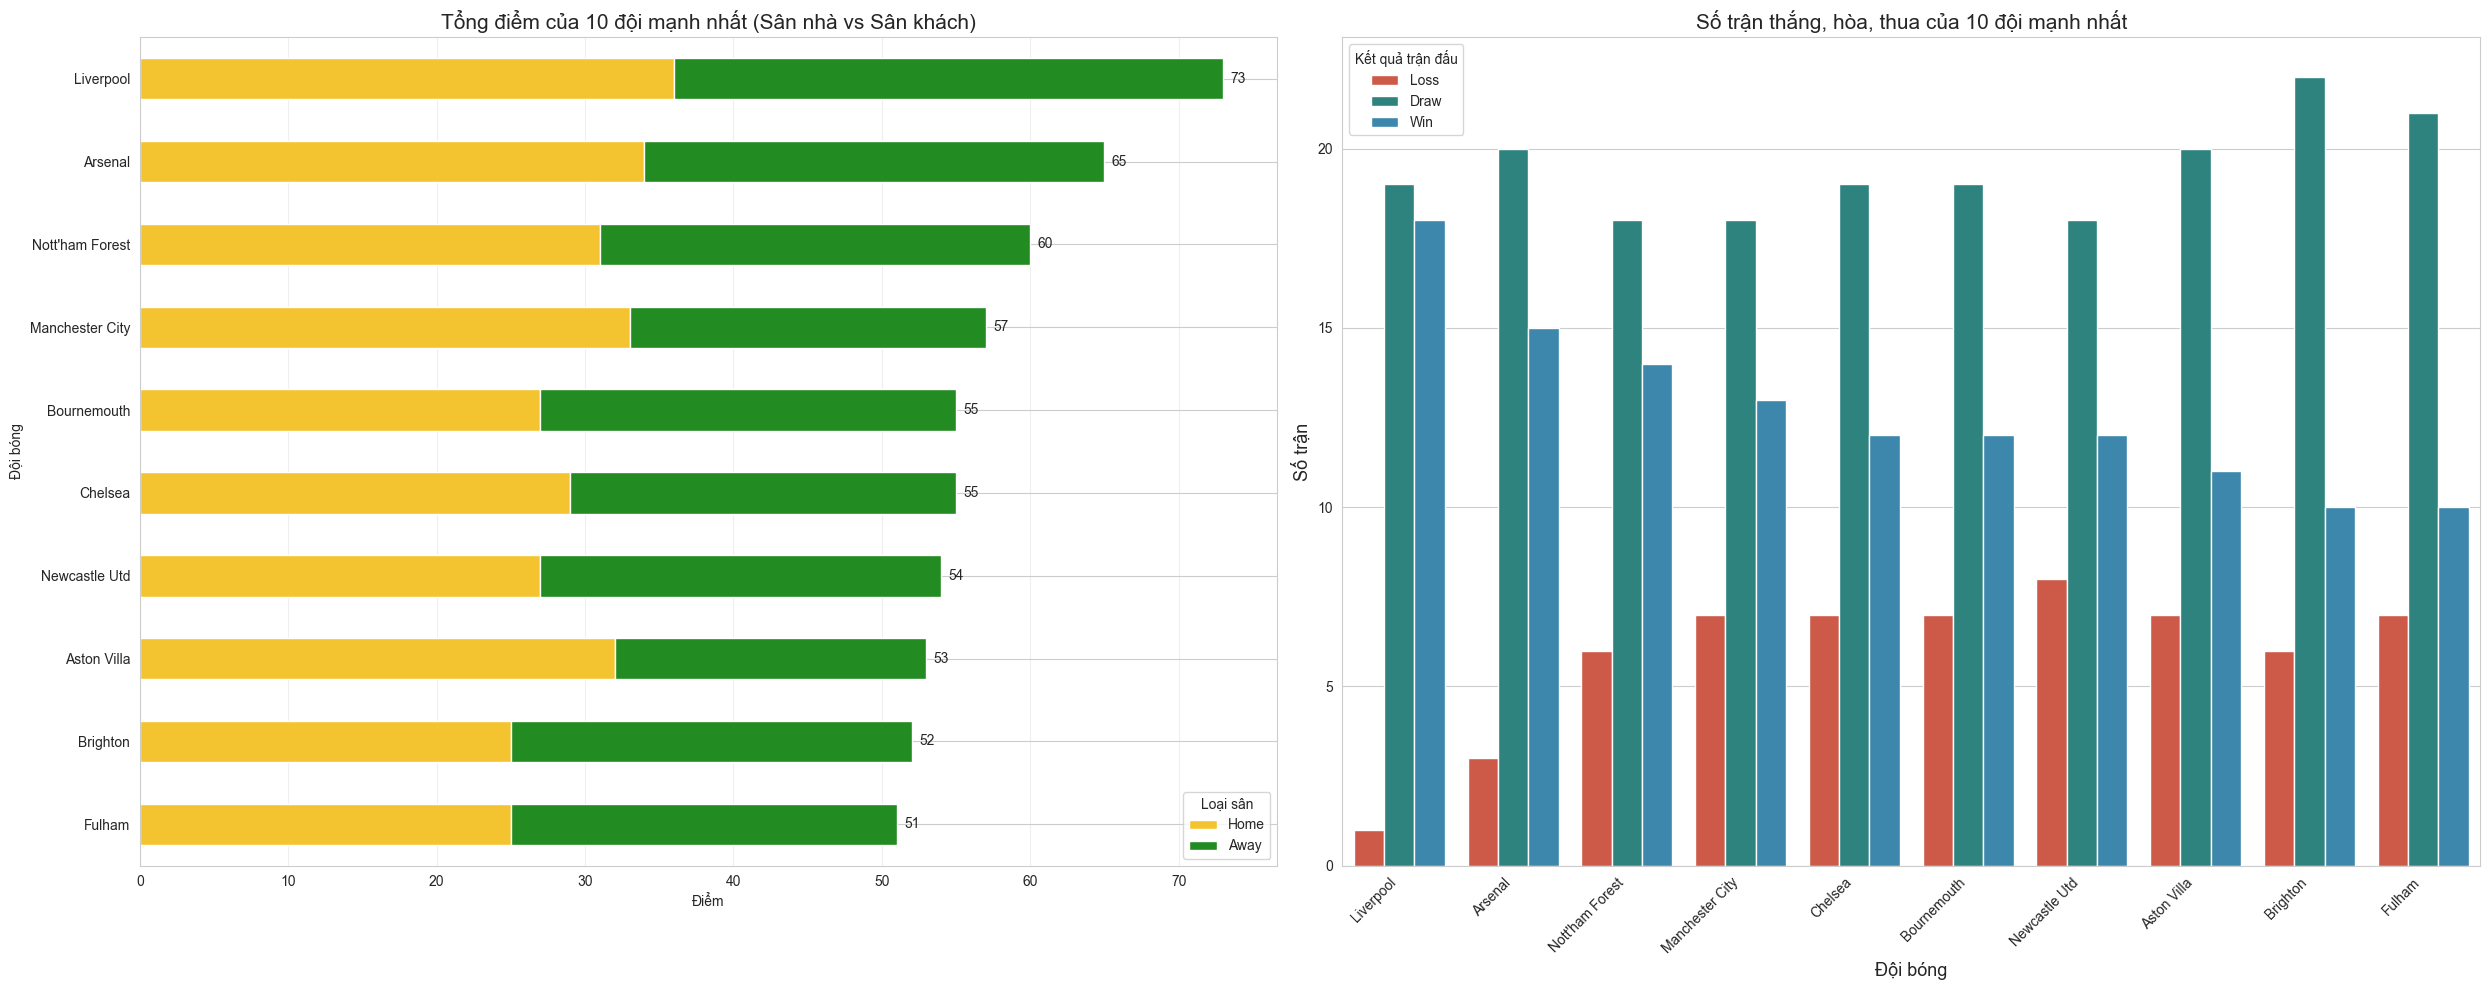

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_team_performance(df, top_n=10):
    # Nhóm kết quả sân nhà và sân khách
    home_results = df.groupby('Home')['Result_Home'].value_counts().unstack().fillna(0)
    away_results = df.groupby('Away')['Result_Home'].value_counts().unstack().fillna(0)

    # Hoán đổi kết quả sân khách (Win <-> Loss)
    if 'Win' in away_results.columns and 'Loss' in away_results.columns:
        away_results[['Win', 'Loss']] = away_results[['Loss', 'Win']].copy()

    # Hàm tính điểm dựa trên số trận
    def calculate_points(results):
        if {'Win', 'Draw', 'Loss'}.issubset(results.columns):
            points = results['Win'] * 3 + results['Draw']
            return points.to_frame('Points')
        return pd.DataFrame(columns=['Points'])

    # Tính điểm cho sân nhà & sân khách
    home_points = calculate_points(home_results)
    home_points['Type'] = 'Home'

    away_points = calculate_points(away_results)
    away_points['Type'] = 'Away'

    # Gộp điểm lại
    team_points = pd.concat([home_points, away_points]).reset_index().rename(columns={'index': 'Team'})
    team_points_pivot = team_points.pivot(index='Team', columns='Type', values='Points').fillna(0)
    team_points_pivot['Total'] = team_points_pivot['Home'] + team_points_pivot['Away']
    
    # Chọn top N đội có điểm cao nhất
    team_points_pivot = team_points_pivot.sort_values('Total', ascending=False).head(top_n)

    # 📊 Tính số trận thắng, hòa, thua
    team_results = home_results.add(away_results, fill_value=0).astype(int).reset_index().melt(id_vars='Home', var_name='Result', value_name='Matches')
    team_results.rename(columns={'Home': 'Team'}, inplace=True)
    team_results = team_results.merge(team_points_pivot[['Total']], left_on='Team', right_index=True)
    
    # Chỉ giữ lại các đội nằm trong top N
    team_results = team_results[team_results['Team'].isin(team_points_pivot.index)]
    team_results = team_results.sort_values('Total', ascending=False)

    # 🎨 Vẽ cả hai biểu đồ trong một figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

    # Biểu đồ tổng điểm (Stacked Bar Chart)
    team_points_pivot[['Home', 'Away']].plot(kind='barh', color=['#F4C430', '#228B22'], stacked=True, colormap='viridis', ax=ax1)
    ax1.set_title(f'Tổng điểm của {top_n} đội mạnh nhất (Sân nhà vs Sân khách)', fontsize=15)
    ax1.set_xlabel('Điểm')
    ax1.set_ylabel('Đội bóng')
    ax1.legend(title='Loại sân')
    ax1.grid(axis='x', alpha=0.3)
    ax1.invert_yaxis()

    # Thêm tổng điểm vào cuối mỗi thanh
    for i, team in enumerate(team_points_pivot.index):
        ax1.text(team_points_pivot.loc[team, 'Total'] + 0.5, i, f"{team_points_pivot.loc[team, 'Total']:.0f}", va='center')
    custom_palette = {'Loss': '#E34A33', 'Draw': '#21918c', 'Win': '#2B8CBE'}   
    # Biểu đồ số trận thắng, hòa, thua (Grouped Bar Chart)
    sns.barplot(data=team_results, x='Team', y='Matches', hue='Result', palette=custom_palette, 
                order=team_results['Team'].unique(), hue_order=['Loss', 'Draw', 'Win'], ax=ax2)
    ax2.set_xlabel('Đội bóng', fontsize=13)
    ax2.set_ylabel('Số trận', fontsize=13)
    ax2.set_title(f'Số trận thắng, hòa, thua của {top_n} đội mạnh nhất', fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.legend(title='Kết quả trận đấu')

    plt.tight_layout()
    plt.show()

# Gọi hàm với số đội muốn hiển thị (ví dụ: 8 đội)
plot_team_performance(df, top_n=10)


**Nhận Xét:** Liverpool dẫn đầu về tổng điểm, trong khi các đội khác có sự chênh lệch rõ rệt giữa sân nhà và sân khách, với sự phân hóa về tỷ lệ thắng, hòa, thua.

### 3.5 Phân tích thẻ phạt


In [22]:
# Phân tích thẻ vàng và thẻ đỏ
cards_home = df.groupby('Home')[['Yellow_Cards_Home', 'Red_Cards_Home']].sum().reset_index()
cards_home = cards_home.sort_values('Yellow_Cards_Home', ascending=False)
display(cards_home)
cards_away = df.groupby('Away')[['Yellow_Cards_Away', 'Red_Cards_Away']].sum().reset_index()
cards_away = cards_away.sort_values('Yellow_Cards_Away', ascending=False)
display(cards_away)
# Tổng thẻ sân nhà và sân khách
df_total = cards_home.merge(cards_away, left_on='Home', right_on='Away', how='outer')
df_total['Total_Yellow_Cards'] = df_total['Yellow_Cards_Home'] + df_total['Yellow_Cards_Away']
df_total['Total_Red_Cards'] = df_total['Red_Cards_Home'] + df_total['Red_Cards_Away']
df_total = df_total.sort_values(by = 'Total_Yellow_Cards', ascending=False)
# cards = cards_away.merge(cards_home[['Home', 'Yellow_Cards_Home']], on='Home', suffixes=('_away', '_home'))
# print(cards)
display(df_total)


,Home,Yellow_Cards_Home,Red_Cards_Home
5,Chelsea,38,0
10,Leicester City,35,0
18,West Ham,33,0
13,Manchester Utd,30,1
9,Ipswich Town,30,0
16,Southampton,29,3
14,Newcastle Utd,29,1
7,Everton,29,1
2,Bournemouth,28,1
8,Fulham,28,1


,Away,Yellow_Cards_Away,Red_Cards_Away
16,Southampton,43,0
2,Bournemouth,39,0
15,Nott'ham Forest,38,0
5,Chelsea,38,0
9,Ipswich Town,37,0
19,Wolves,33,0
11,Liverpool,31,0
0,Arsenal,31,2
13,Manchester Utd,30,0
4,Brighton,29,0


,Home,Yellow_Cards_Home,Red_Cards_Home,Away,Yellow_Cards_Away,Red_Cards_Away,Total_Yellow_Cards,Total_Red_Cards
5,Chelsea,38,0,Chelsea,38,0,76,0
16,Southampton,29,3,Southampton,43,0,72,3
9,Ipswich Town,30,0,Ipswich Town,37,0,67,0
2,Bournemouth,28,1,Bournemouth,39,0,67,1
10,Leicester City,35,0,Leicester City,27,0,62,0
18,West Ham,33,0,West Ham,28,1,61,1
13,Manchester Utd,30,1,Manchester Utd,30,0,60,1
19,Wolves,27,0,Wolves,33,0,60,0
7,Everton,29,1,Everton,28,0,57,1
8,Fulham,28,1,Fulham,28,1,56,2


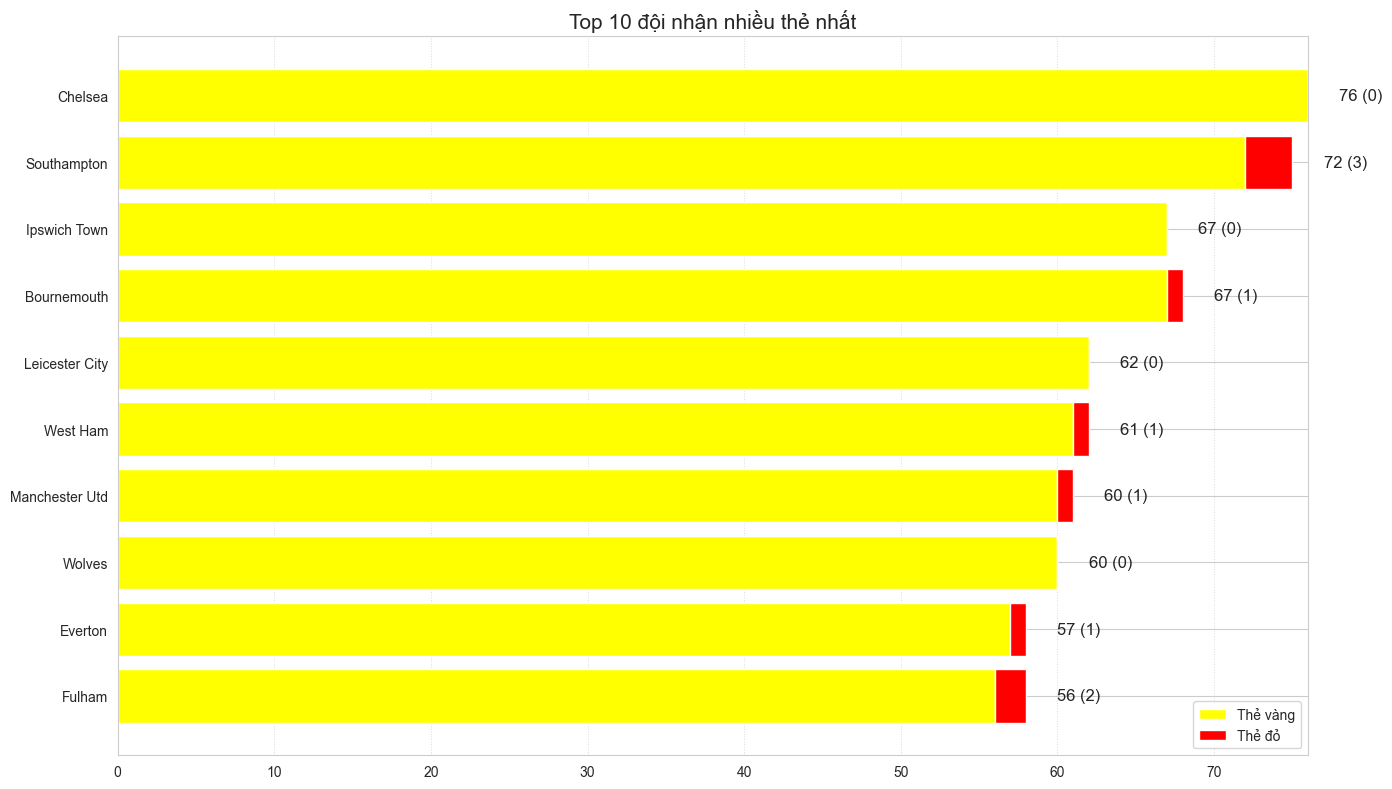

In [23]:
# Lọc top 10 đội nhận nhiều thẻ vàng nhất
top_yellow_cards = df_total.nlargest(10, 'Total_Yellow_Cards')

# Tạo figure và trục
fig, ax = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ stacked bar cho thẻ vàng và thẻ đỏ
ax.barh(top_yellow_cards['Home'], top_yellow_cards['Total_Yellow_Cards'], color='yellow', label='Thẻ vàng')
ax.barh(top_yellow_cards['Home'], top_yellow_cards['Total_Red_Cards'], color='red', left=top_yellow_cards['Total_Yellow_Cards'], label='Thẻ đỏ')

# Thêm số thẻ vào cuối mỗi thanh
for i, (y, r) in enumerate(zip(top_yellow_cards['Total_Yellow_Cards'], top_yellow_cards['Total_Red_Cards'])):
    ax.text(y + r + 2, i, f"{y} ({r})", va='center', fontsize=12)

# Cấu hình biểu đồ
ax.set_title('Top 10 đội nhận nhiều thẻ nhất', fontsize=15)
ax.invert_yaxis()
ax.legend()
ax.grid(axis='x', linestyle=':', linewidth=0.7, alpha=0.7)

# Hiển thị
plt.tight_layout()
plt.show()


### 3.6 Phân tích sân vận động và khán giả


In [24]:
# Top 10 sân vận động có số khán giả trung bình cao nhất
attendance_by_venue = df.groupby('Venue')['Attendance'].agg(['mean', 'sum', 'count']).reset_index()
attendance_by_venue = attendance_by_venue.sort_values('mean', ascending=False)
display(attendance_by_venue)


,Venue,mean,sum,count
9,Old Trafford,73719.769231,958357.0,13
7,London Stadium,62464.153846,812034.0,13
17,Tottenham Hotspur Stadium,61338.923077,797406.0,13
0,Anfield,60286.000000,723432.0,12
2,Emirates Stadium,60274.769231,783572.0,13
3,Etihad Stadium,52904.833333,634858.0,12
12,St James' Park,52186.083333,626233.0,12
18,Villa Park,41958.466667,629377.0,15
14,Stamford Bridge,39608.416667,475301.0,12
4,Goodison Park,38131.928571,533847.0,14


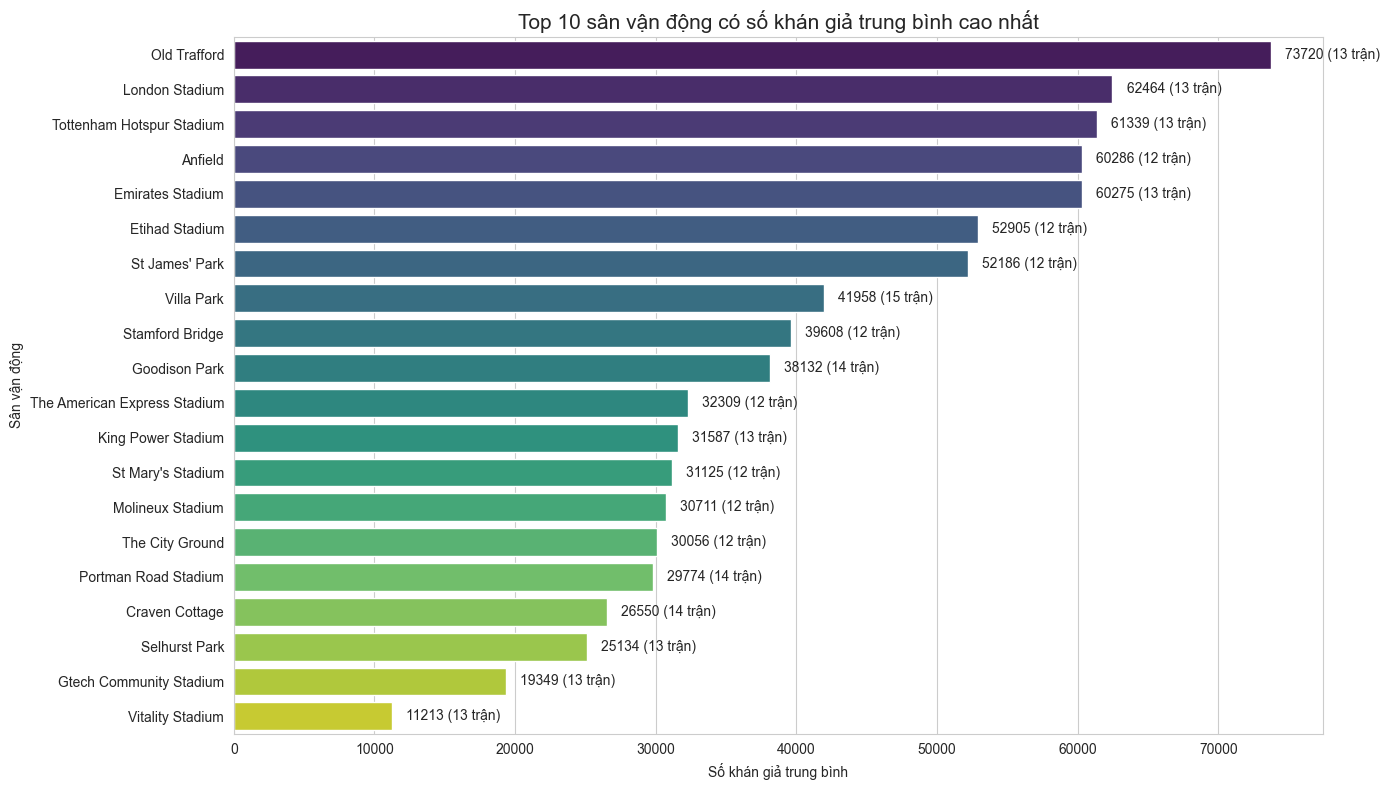

In [25]:

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='mean', y='Venue', data=attendance_by_venue, palette='viridis')
plt.title('Top 10 sân vận động có số khán giả trung bình cao nhất', fontsize=15)
plt.xlabel('Số khán giả trung bình')
plt.ylabel('Sân vận động')

# Thêm số trận đấu vào cuối mỗi thanh
for i, v in enumerate(attendance_by_venue['mean']):
    ax.text(v + 1000, i, f"{v:.0f} ({attendance_by_venue['count'].iloc[i]} trận)", va='center')

plt.tight_layout()
plt.show()


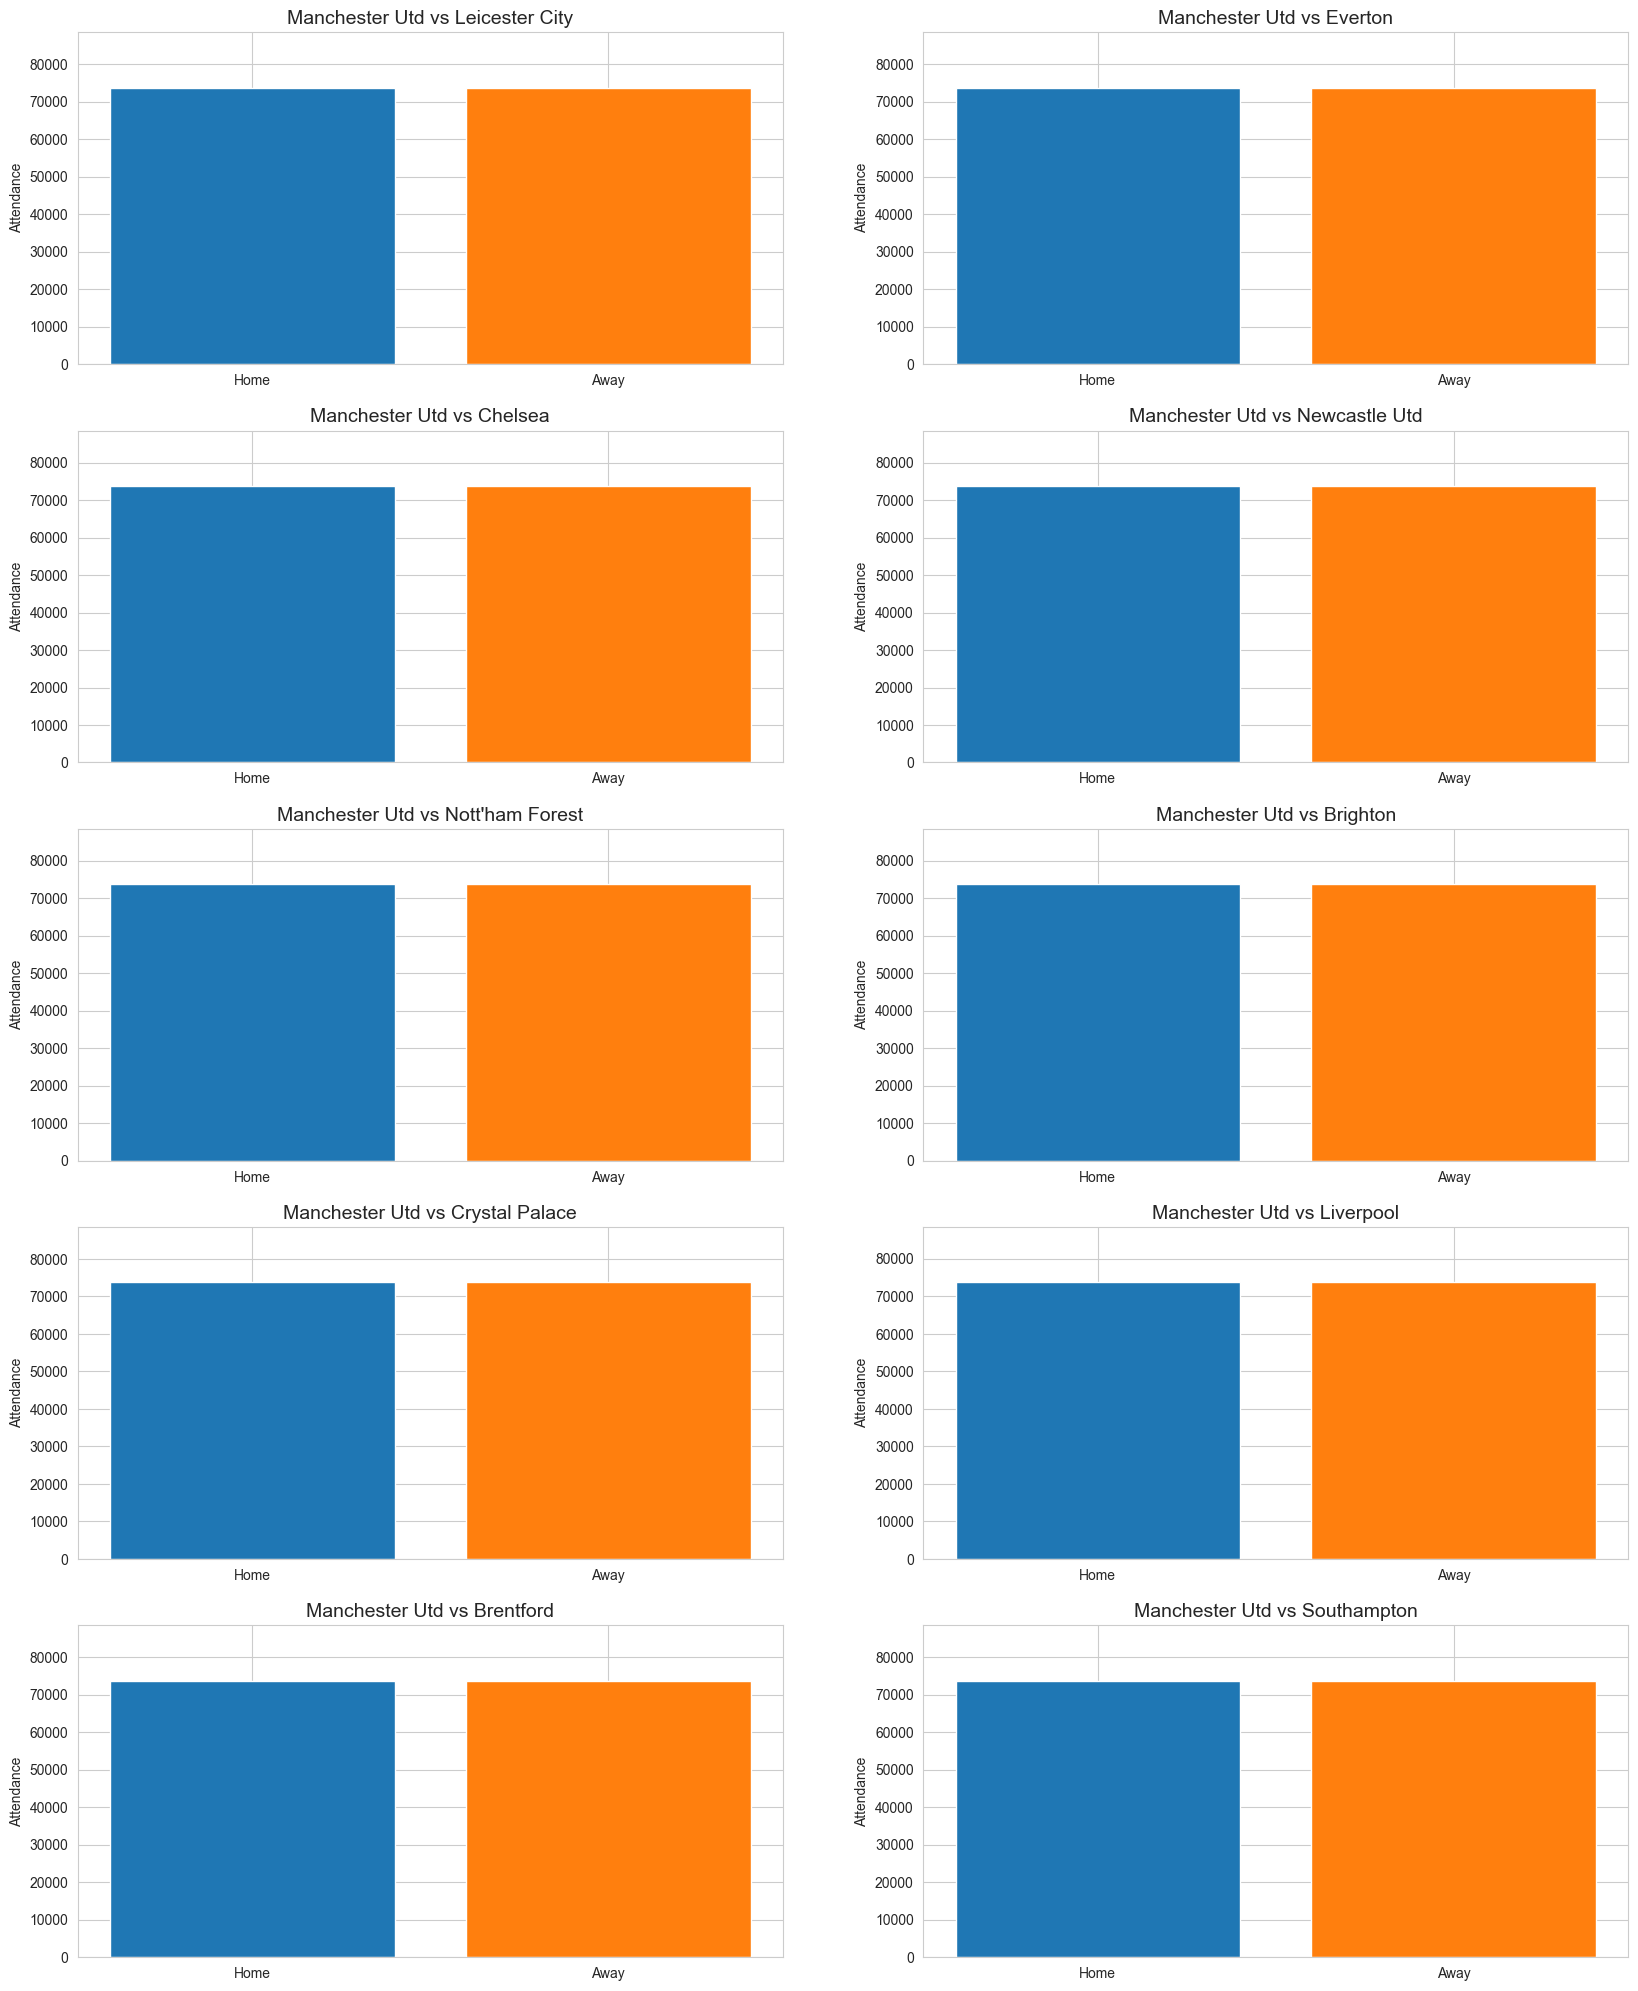

In [26]:
# Visual những trận đấu có attendance cao nhất

# Sắp xếp dữ liệu theo attendance giảm dần
top_attendance = df.nlargest(10, 'Attendance')

# Tạo figure và các subplot
fig, axes = plt.subplots(5, 2, figsize = (20,25))

# Vẽ biểu đồ cho từng trận
for i, ax in enumerate(axes.flat):
    match = top_attendance.iloc[i]
    ax.bar(['Home', 'Away'], [match['Attendance'], match['Attendance']], color=['#1f77b4', '#ff7f0e'])
    ax.set_title(f"{match['Home']} vs {match['Away']}", fontsize=14)
    ax.set_ylabel('Attendance')
    ax.set_ylim(0, match['Attendance'] * 1.2)



### 3.7 Phân tích HLV


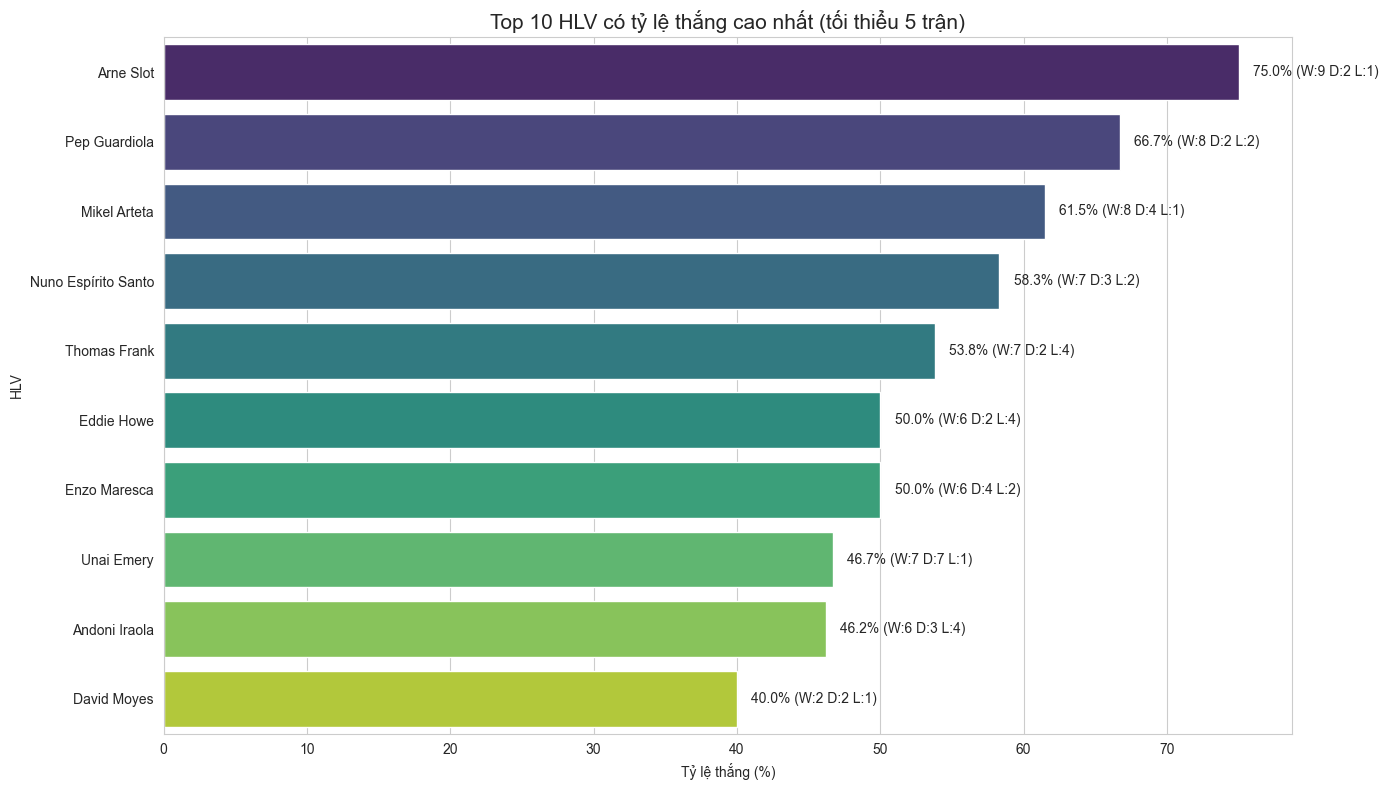

In [27]:

# Hiệu suất của các HLV đội nhà
coach_performance = df.groupby('Manager_Home')['Result_Home'].value_counts().unstack().fillna(0)
if 'Win' in coach_performance.columns and 'Draw' in coach_performance.columns and 'Loss' in coach_performance.columns:
    coach_performance['Total_Matches'] = coach_performance.sum(axis=1)
    coach_performance['Win_Rate'] = (coach_performance['Win'] / coach_performance['Total_Matches'] * 100).round(1)
    coach_performance = coach_performance.sort_values('Win_Rate', ascending=False)
    
    # Lọc các HLV có ít nhất 5 trận
    coach_performance_filtered = coach_performance[coach_performance['Total_Matches'] >= 5].head(10)
    
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=coach_performance_filtered['Win_Rate'], y=coach_performance_filtered.index, data=coach_performance_filtered, palette='viridis')
    plt.title('Top 10 HLV có tỷ lệ thắng cao nhất (tối thiểu 5 trận)', fontsize=15)
    plt.xlabel('Tỷ lệ thắng (%)')
    plt.ylabel('HLV')
    
    # Thêm thông tin về số trận thắng/thua/hòa
    for i, v in enumerate(coach_performance_filtered['Win_Rate']):
        coach = coach_performance_filtered.index[i]
        text = f"{v}% (W:{coach_performance_filtered.loc[coach, 'Win']:.0f} D:{coach_performance_filtered.loc[coach, 'Draw']:.0f} L:{coach_performance_filtered.loc[coach, 'Loss']:.0f})"
        ax.text(v + 1, i, text, va='center')
    
    plt.tight_layout()
    plt.show()


### 3.8 Phân tích đội hình


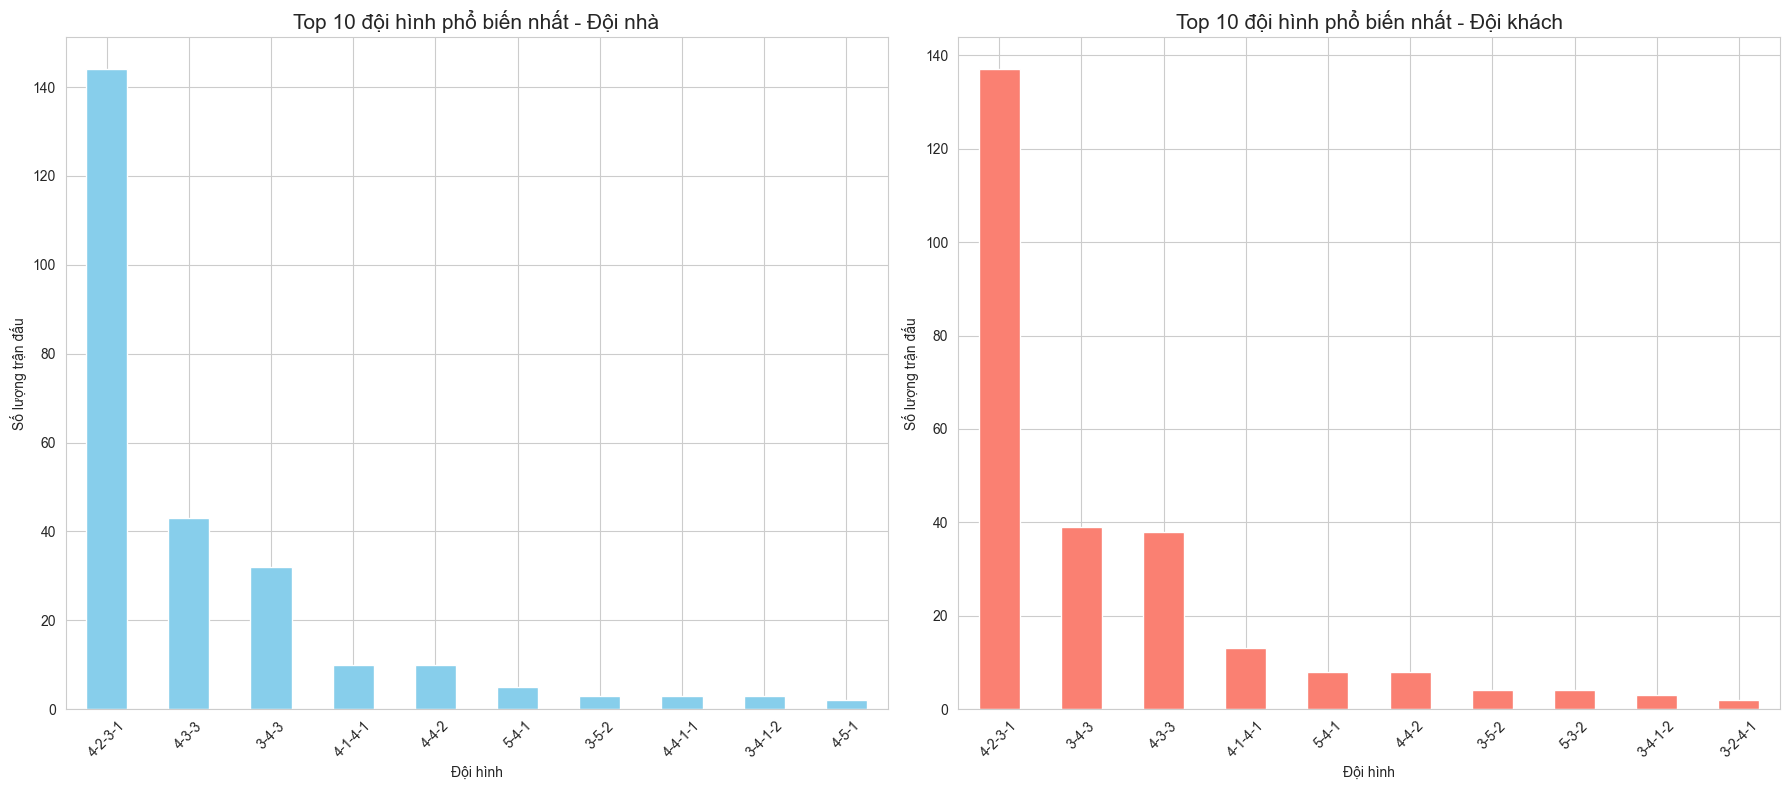

In [28]:
# Phân tích chiến thuật phổ biến
formation_home = df['Lineup_Home'].value_counts().head(10)
formation_away = df['Lineup_Away'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Đội hình đội nhà
formation_home.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 đội hình phổ biến nhất - Đội nhà', fontsize=15)
ax1.set_xlabel('Đội hình')
ax1.set_ylabel('Số lượng trận đấu')
ax1.set_xticklabels(formation_home.index, rotation=45)

# Đội hình đội khách
formation_away.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Top 10 đội hình phổ biến nhất - Đội khách', fontsize=15)
ax2.set_xlabel('Đội hình')
ax2.set_ylabel('Số lượng trận đấu')
ax2.set_xticklabels(formation_away.index, rotation=45)

plt.tight_layout()
plt.show()



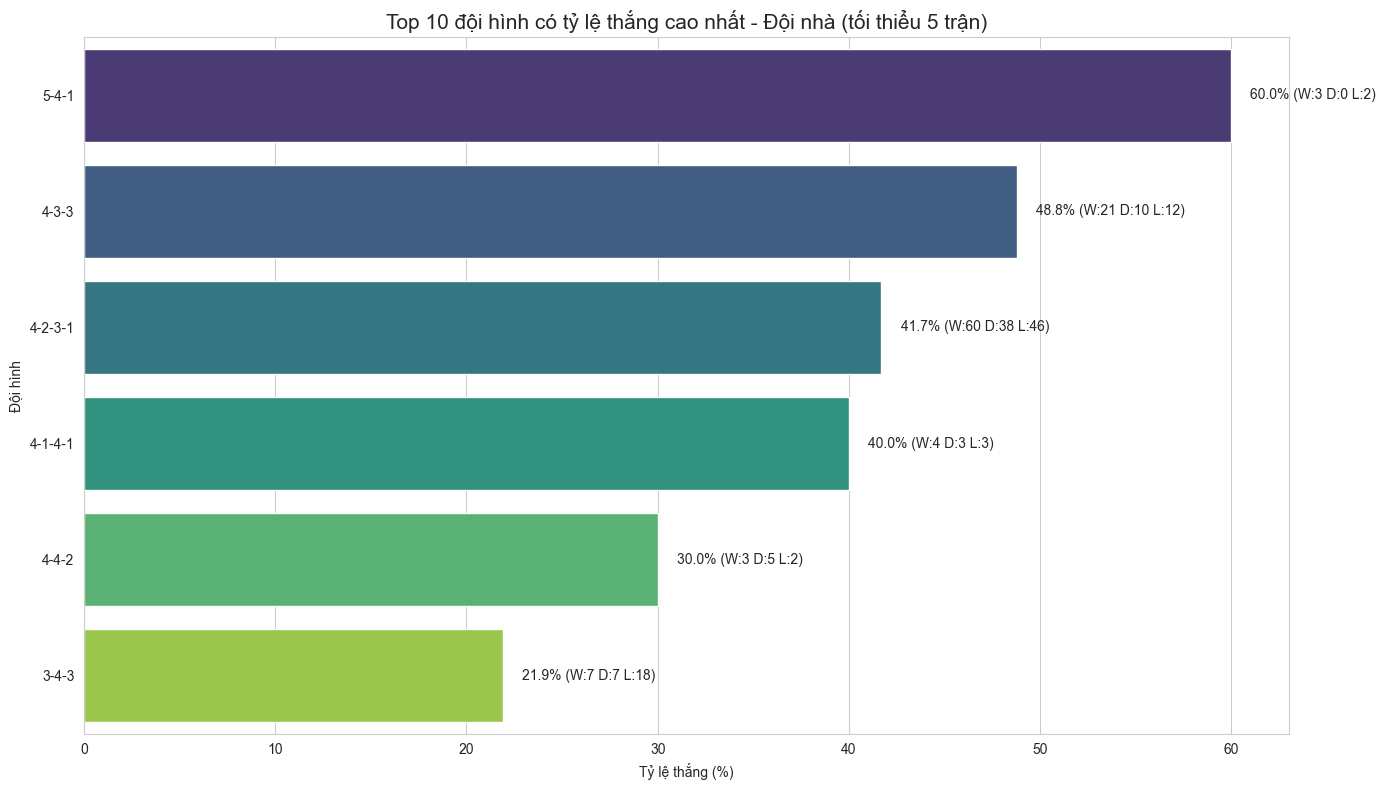

In [29]:

# Phân tích hiệu suất của các đội hình khác nhau (Đội nhà)
formation_home_performance = df.groupby('Lineup_Home')['Result_Home'].value_counts().unstack().fillna(0)
if 'Win' in formation_home_performance.columns and 'Draw' in formation_home_performance.columns and 'Loss' in formation_home_performance.columns:
    formation_home_performance['Total_Matches'] = formation_home_performance.sum(axis=1)
    formation_home_performance['Win_Rate'] = (formation_home_performance['Win'] / formation_home_performance['Total_Matches'] * 100).round(1)
    
    # Lọc các đội hình có ít nhất 5 trận
    formation_filtered = formation_home_performance[formation_home_performance['Total_Matches'] >= 5].sort_values('Win_Rate', ascending=False).head(10)
    
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Win_Rate', y=formation_filtered.index, data=formation_filtered, palette='viridis')
    plt.title('Top 10 đội hình có tỷ lệ thắng cao nhất - Đội nhà (tối thiểu 5 trận)', fontsize=15)
    plt.xlabel('Tỷ lệ thắng (%)')
    plt.ylabel('Đội hình')
    
    # Thêm thông tin về số trận thắng/thua/hòa
    for i, v in enumerate(formation_filtered['Win_Rate']):
        formation = formation_filtered.index[i]
        text = f"{v}% (W:{formation_filtered.loc[formation, 'Win']:.0f} D:{formation_filtered.loc[formation, 'Draw']:.0f} L:{formation_filtered.loc[formation, 'Loss']:.0f})"
        ax.text(v + 1, i, text, va='center')
    
    plt.tight_layout()
    plt.show()

In [30]:
df.head()

,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,Home_Goals,Away_Goals,Total_Goals,Goal_Difference,Result_Home,Had_Goals
0,Fri,2024-08-16,20:00,Manchester Utd,2.4,1–0,0.4,Fulham,73297.0,Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55.0,45.0,36.0,20.0,2,3,0,0,1.0,0.0,1.0,1.0,Win,True
1,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,30014.0,Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38.0,62.0,29.0,28.0,3,1,0,0,0.0,2.0,2.0,-2.0,Loss,True
2,Sat,2024-08-17,15:00,Newcastle Utd,0.3,1–0,1.8,Southampton,52196.0,St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23.0,77.0,33.0,16.0,2,4,1,0,1.0,0.0,1.0,1.0,Win,True
3,Sat,2024-08-17,15:00,Nott'ham Forest,1.3,1–1,1.2,Bournemouth,29763.0,The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53.0,47.0,57.0,31.0,1,3,0,0,1.0,1.0,2.0,0.0,Draw,True
4,Sat,2024-08-17,15:00,Everton,0.5,0–3,1.4,Brighton,39217.0,Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40.0,60.0,11.0,50.0,1,1,1,0,0.0,3.0,3.0,-3.0,Loss,True
